<a href="https://colab.research.google.com/github/raulsomazabracho/Web-Scrapping/blob/main/Extracci%C3%B3n_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extraer info de esta lista de IMDB :
https://www.imdb.com/search/title/?co...

Guia: 
https://www.youtube.com/watch?v=I5L3OJ-xtsw

# UNA SOLA PAGINA

## Importar Librerias

In [ ]:
pip install selenium

In [ ]:
#Librerias usuales
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Librerias para leer de la pagina web
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
import re

## Conexión con la pagina

In [ ]:
url = 'https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating'

In [ ]:
#Accedemos a la pagina web
response = requests.get(url)
response

<Response [200]>

In [ ]:
#Creamos el objeto soup pasndole la respuesta
soup = BeautifulSoup(response.content, 'html.parser')

In [ ]:
print(soup)


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>IMDb "Top 1000"
(Sorted by IMDb Rating Descending) - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/search/title/?groups=top_1000" rel="canonical"/>
<meta content="http:

"soup" es todo el codigo HTML de la pagina

## Creación de Variables

Se crearán listas vacias donde luego se colocará la información que será nuestro dataset

In [ ]:
nombre= []
año = []
duracion = []
rating = []
metascore=[]
votos = []
taquilla = []

## Extracción de la data

### Inspección

Para lo siguiente debemos inspeccionar la pagina web y ver en cual linea de codigo está la informacion de la pelicula que requerimos

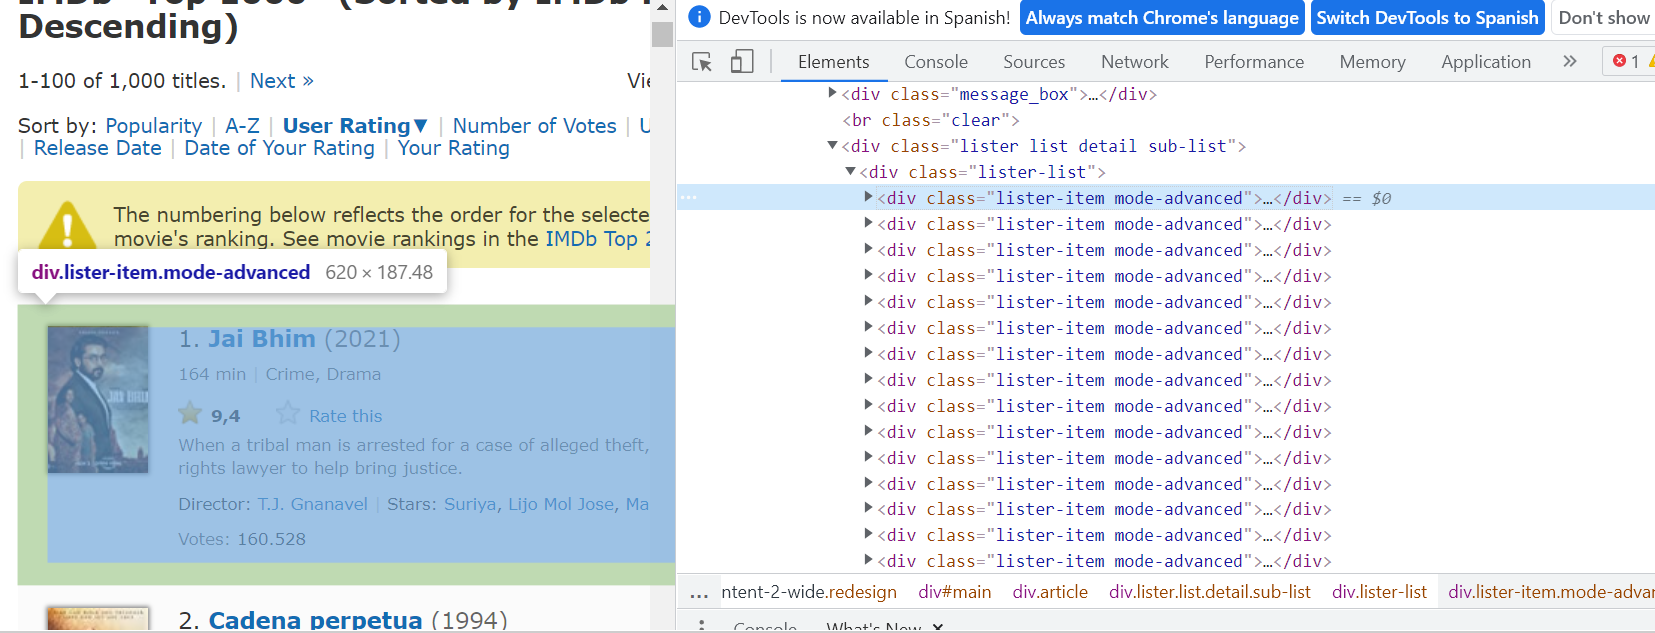

 Con la linea de codigo seleccionada creamos el objeto con toda la info de cada pelicula

### Validación de información

In [ ]:
# Creamos el objeto
info_peliculas = soup.findAll('div', attrs = {'class':'lister-item mode-advanced'})#hay que ver donde se encuentra la info y con cual ttulo en este caso es en div y con el titulo lister...


### Consolidación

In [ ]:
#Creamos un ciclo que nos consolide todo lo que esta en info_peliculas
for i in info_peliculas:
  nombre_pelicula = i.h3.a.text #h3 es donde está localizaco el nombre, se puede ver inspeccionando, .a.text es para traerlo como texto
  nombre.append(nombre_pelicula)

  año_pelicula = i.h3.find('span', class_ = 'lister-item-year text-muted unbold').text.replace('(','').replace(')','')# ver donde se encuentra aca es en h3 y en find ponemos donde esta adentro cual texto nos lo trae
  año.append(año_pelicula)

  duracion_pelicula = i.p.find('span', class_ ='runtime').text.replace(' min','')  # ver donde se encuentra aca es en h3 y en find ponemos donde esta adentro cual texto nos lo trae
  duracion.append(duracion_pelicula)

  rating_pelicula = i.find('div', class_ = 'inline-block ratings-imdb-rating').text.replace('\n','')
  rating.append(rating_pelicula)

  metascore_pelicula = i.find('span', class_ ='metascore').text.replace(' ','') if i.find('span', class_ ='metascore') else '????' # si alguna pelicula no tiene metascore completar con los signos
  metascore.append(metascore_pelicula)

  #Votos pelicula y taquilla tienen el mismo nombre en el HTML por lo que hay que utilizar find_all y el indice de cada uno
  valores = i.find_all('span', attrs ={'name':'nv'})

  votos_pelicula = valores[0].text.replace(',','')
  votos.append(votos_pelicula)

  taquilla_pelicula = valores[1].text.replace('$','').replace(',','').replace('M','') if len(valores) >1 else 0
  taquilla.append(taquilla_pelicula)

## Creación del DF

Lo creamos utilizando un diccionario con las listas ya creadas

In [ ]:
peliculas = pd.DataFrame({'Nombre':nombre,'Año': año,'Duracion':duracion,'Rating':rating,'MetaScore':metascore,'Votos':votos,'Taquilla':taquilla})

In [ ]:
peliculas.head()

,Nombre,Año,Duracion,Rating,MetaScore,Votos,Taquilla
0,Jai Bhim,2021,164,9.4,????,160638,0
1,The Shawshank Redemption,1994,142,9.3,80,2510286,28.34
2,The Godfather,1972,175,9.2,100,1729657,134.97
3,Soorarai Pottru,2020,153,9.1,????,104949,0
4,Spider-Man: No Way Home,2021,148,9.0,71,250394,0


In [ ]:
peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Nombre     100 non-null    object
 1   Año        100 non-null    object
 2   Duracion   100 non-null    object
 3   Rating     100 non-null    object
 4   MetaScore  100 non-null    object
 5   Votos      100 non-null    object
 6   Taquilla   100 non-null    object
dtypes: object(7)
memory usage: 5.6+ KB


# VARIAS PAGINAS AL MISMO TIEMPO

Este codigo pemite realizar lo que la parte anterior pero en lugar de hacer scrap de una sola pagina se hace de muchas paginas al mismo tiempo

## Importamos Librerias

In [ ]:
#Librerias usuales
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot

#Librerias para leer de la pagina web
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
import re

## Creación de las variables

In [ ]:
nombre_2= []
año_2 = []
duracion_2 = []
rating_2 = []
metascore_2=[]
votos_2 = []
taquilla_2 = []

## Consolidación de la información

La pagina tiene la particularidad que cada 100 peliculas hay una nueva pagina y la url no varia, solo cambia la parte de start, por lo que con un loop podemos leer cada una.

Hacemos un arreglo numpy que comience en 1 y vaya de 100 en 100
e iteramos a traves de este arreglo haciendo el mismo codigo de la seccion anterior

In [ ]:
#Arreglo numpy sobre el cual itera 1-->101-->201-->301,etc
paginas = np.arange(1,1000,100)

In [ ]:
#Hacemos el loop para leer las paginas
for pagina in paginas:
  response = requests.get('https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start='+str(paginas)+'&ref_=adv_nxt')
  soup = BeautifulSoup(response.content, 'html.parser')

  #hay que ver donde se encuentra la info y con cual ttulo en este caso es en div y con el titulo lister...
  info_peliculas_2 = soup.findAll('div', attrs = {'class':'lister-item mode-advanced'})

  #Creamos un ciclo que nos consolide todo lo que esta en info_peliculas
  for i in info_peliculas_2:
    nombre_pelicula_2 = i.h3.a.text #h3 es donde está localizaco el nombre, se puede ver inspeccionando, .a.text es para traerlo como texto
    nombre_2.append(nombre_pelicula_2)

    año_pelicula_2 = i.h3.find('span', class_ = 'lister-item-year text-muted unbold').text.replace('(','').replace(')','')# ver donde se encuentra aca es en h3 y en find ponemos donde esta adentro cual texto nos lo trae
    año_2.append(año_pelicula_2)

    duracion_pelicula_2 = i.p.find('span', class_ ='runtime').text.replace(' min','')  # ver donde se encuentra aca es en h3 y en find ponemos donde esta adentro cual texto nos lo trae
    duracion_2.append(duracion_pelicula_2)

    rating_pelicula_2 = i.find('div', class_ = 'inline-block ratings-imdb-rating').text.replace('\n','')
    rating_2.append(rating_pelicula_2)

    metascore_pelicula_2 = i.find('span', class_ ='metascore').text.replace(' ','') if i.find('span', class_ ='metascore') else '????' # si alguna pelicula no tiene metascore completar con los signos
    metascore_2.append(metascore_pelicula_2)

    #Votos pelicula y taquilla tienen el mismo nombre en el HTML por lo que hay que utilizar find_all y el indice de cada uno
    valores_2 = i.find_all('span', attrs ={'name':'nv'})

    votos_pelicula_2 = valores[0].text.replace(',','')
    votos_2.append(votos_pelicula_2)

    taquilla_pelicula_2 = valores[1].text.replace('$','').replace(',','').replace('M','') if len(valores) >1 else 0
    taquilla_2.append(taquilla_pelicula_2)



## Creación del DF

In [ ]:
peliculas_2 = pd.DataFrame({'Nombre':nombre_2,'Año': año_2,'Duracion':duracion_2,'Rating':rating_2,'MetaScore':metascore_2,'Votos':votos_2,'Taquilla':taquilla_2})


In [ ]:
print(len(peliculas_2))
peliculas_2.head(5)

1000


,Nombre,Año,Duracion,Rating,MetaScore,Votos,Taquilla
0,Jai Bhim,2021,164,9.4,????,166413,6.86
1,The Shawshank Redemption,1994,142,9.3,80,166413,6.86
2,The Godfather,1972,175,9.2,100,166413,6.86
3,Soorarai Pottru,2020,153,9.1,????,166413,6.86
4,Spider-Man: No Way Home,2021,148,9.0,71,166413,6.86


## Limpieza del DF

In [ ]:
#Transformamos las columnas a numericas
peliculas_2[['Año','Duracion','Rating','MetaScore','Votos','Taquilla']] =  peliculas_2[['Año','Duracion','Rating','MetaScore','Votos','Taquilla']].apply(pd.to_numeric,errors = 'coerce')

In [ ]:
peliculas_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nombre     1000 non-null   object 
 1   Año        980 non-null    float64
 2   Duracion   1000 non-null   int64  
 3   Rating     1000 non-null   float64
 4   MetaScore  780 non-null    float64
 5   Votos      1000 non-null   int64  
 6   Taquilla   1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [ ]:
#Rellenamos los vacios con la media
peliculas_2 = peliculas_2.fillna('mean')

In [ ]:
peliculas_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nombre     1000 non-null   object 
 1   Año        1000 non-null   object 
 2   Duracion   1000 non-null   int64  
 3   Rating     1000 non-null   float64
 4   MetaScore  1000 non-null   object 
 5   Votos      1000 non-null   int64  
 6   Taquilla   1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


## Visualización de la Data

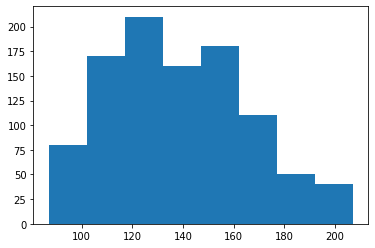

In [ ]:
#Visualizamos distribucion de la duracion

plt.hist(x= peliculas_2['Duracion'],bins = 8)
plt.show()

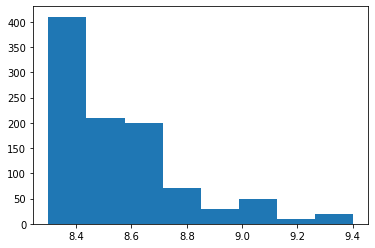

In [ ]:
#Visualizamos distribucion de la duracion

plt.hist(x= peliculas_2['Rating'],bins = 8)
plt.show()